Compare the difference.<br>

In [362]:
import numpy as np
import sympy
from sympy import lambdify
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [363]:
def generate_oe_matrix(variance_threshold_L = 0.7, variance_threshold_U = 0.8):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(6, 6) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)

0.7015692648899017 

[[16.12 29.61 19.59 23.43 18.66 19.76]
 [29.61  3.43 41.47  8.12 14.82 16.06]
 [19.59 41.47  1.78 14.29 27.22 39.2 ]
 [23.43  8.12 14.29 15.57 13.56 10.77]
 [18.66 14.82 27.22 13.56 10.2  24.5 ]
 [19.76 16.06 39.2  10.77 24.5  30.24]] 



In [364]:
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

### PCA
MOSAIC perform PCA on O/E matrix <br>

In [365]:
n = len(oe_zero[0])
x_t = np.transpose(oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
print('explained_variances')
print(explained_variances)

cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)


print('V_Cx[0]')
print(V_Cx[0])
print('Vh[0]')
print(Vh[0])
print('corr_oe')
print(np.corrcoef(oe))
print('cov_x')
print(cov_x)

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum)

explained_variances
[0.7  0.2  0.06 0.03 0.01 0.  ]
V_Cx[0]
[  53.08 -239.67  229.63  -46.88  -73.25 -122.94]
Vh[0]
[ 0.14 -0.65  0.62 -0.13 -0.2  -0.33]
corr_oe
[[ 1.   -0.69  0.43 -0.71 -0.28 -0.45]
 [-0.69  1.   -0.72  0.52  0.7   0.75]
 [ 0.43 -0.72  1.   -0.55 -0.29 -0.3 ]
 [-0.71  0.52 -0.55  1.    0.02 -0.11]
 [-0.28  0.7  -0.29  0.02  1.    0.76]
 [-0.45  0.75 -0.3  -0.11  0.76  1.  ]]
cov_x
[[  18.77  -38.41   25.56  -14.76   -7.41  -18.26]
 [ -38.41  167.42 -128.46   32.1    54.25   90.59]
 [  25.56 -128.46  192.38  -36.07  -24.41  -38.89]
 [ -14.76   32.1   -36.07   22.71    0.47   -4.83]
 [  -7.41   54.25  -24.41    0.47   36.34   43.07]
 [ -18.26   90.59  -38.89   -4.83   43.07   87.4 ]]
cov_x_sum
[123.16347940996886, 511.2315043156626, 445.757005890203, 110.9480225530293, 165.95238540705407, 283.03583809269264]


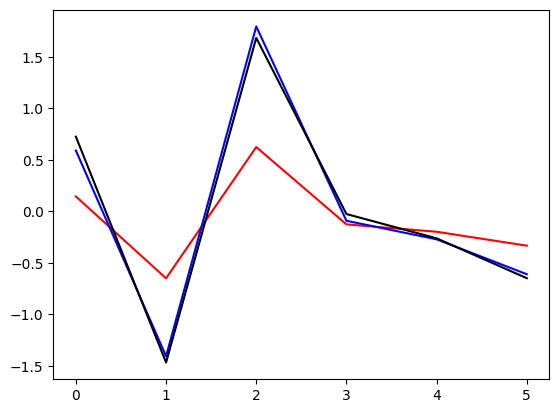

In [366]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh[0], c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [367]:
plt.clf()

<Figure size 640x480 with 0 Axes>

HOMER perform PCA on correlation matrix <br>

In [368]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
print('explained_variances')
print(explained_variances)

cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

print('V_Cx[0]')
print(V_Cx[0])
print('Vh[0]')
print(Vh[0])
print('corr_oe')
print(np.corrcoef(oe))
print('cov_x')
print(cov_x)

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum) 

explained_variances
[0.81 0.15 0.03 0.01 0.   0.  ]
V_Cx[0]
[-0.79  0.92 -0.74  0.61  0.58  0.64]
Vh[0]
[-0.44  0.52 -0.42  0.35  0.33  0.36]
corr_oe
[[ 1.   -0.69  0.43 -0.71 -0.28 -0.45]
 [-0.69  1.   -0.72  0.52  0.7   0.75]
 [ 0.43 -0.72  1.   -0.55 -0.29 -0.3 ]
 [-0.71  0.52 -0.55  1.    0.02 -0.11]
 [-0.28  0.7  -0.29  0.02  1.    0.76]
 [-0.45  0.75 -0.3  -0.11  0.76  1.  ]]
cov_x
[[ 0.39 -0.4   0.32 -0.33 -0.22 -0.25]
 [-0.4   0.48 -0.39  0.3   0.31  0.34]
 [ 0.32 -0.39  0.36 -0.29 -0.22 -0.23]
 [-0.33  0.3  -0.29  0.35  0.1   0.1 ]
 [-0.22  0.31 -0.22  0.1   0.27  0.29]
 [-0.25  0.34 -0.23  0.1   0.29  0.33]]
cov_x_sum
[1.899707759338422, 2.2273664272503995, 1.7941414461134895, 1.4709531846851176, 1.4128819460335837, 1.547213814494423]


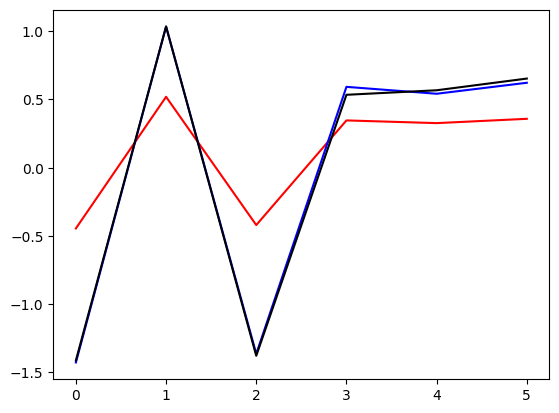

In [369]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if (cov_x_selected[0] > 0) != (Vh[0][0] > 0):
    cov_x_selected = -cov_x_selected

cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh[0], c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [370]:
plt.clf()

<Figure size 640x480 with 0 Axes>